In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans
from functools import reduce
from scipy.signal import find_peaks

In [4]:
def image_segmentation(path, cluster_count, color_channels = 3, colors_3_channels = np.array([[0, 0, 255], [255, 255, 0], [255, 0, 0]]), colors_4_channels = np.array([[0, 0, 255, 255], [255, 255, 0, 255], [255, 0, 0, 255]])):
    
    image = np.asarray(PIL.Image.open(path))                                 # set image as array based on name and directory given using the Python Imaging Library
    X = image.reshape(-1, color_channels)                                    # reshape to be a single pixel per row, based on the count of color channels
    kmeans = KMeans(n_clusters = cluster_count, random_state = 42).fit(X)    # apply k-means clustering based on the desired count of clusters upon the modified object
    
    if(color_channels == 4):                                                 # if there are four color channels use the following
        kmeans.cluster_centers_ = colors_4_channels[:cluster_count]          # set the cluster centers as the designated target colors for much easier processing

    if(color_channels == 3):                                                 # if there are three color channels use the following
        kmeans.cluster_centers_ = colors_3_channels[:cluster_count]          # set the cluster centers as the designated target colors for much easier processing
        
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]                  # assign a color based on the label given of the (altered) cluster centers to a new object
    segmented_img = segmented_img.reshape(image.shape)                       # reshape the former object into the same shape as the given array

    return (segmented_img / np.max(segmented_img))                           # return standardized image object (values should be int from 0 to 255 or floats from 0 to 1)

In [6]:
image = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\physarum_reslices\physarum_reslices_jpg\Reslice of inphase 1.jpg", 3)

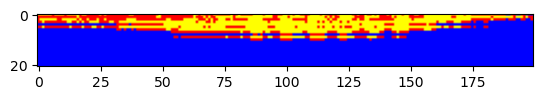

In [8]:
plt.imshow(image)

In [10]:
image.shape

(21, 200, 3)

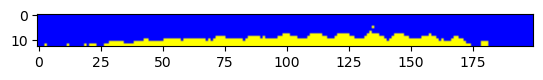

In [12]:
image2 = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\physarum_reslices\physarum_reslices_jpg\Reslice of inphase 2.jpg", 2)
plt.imshow(image2)

In [14]:
image2.shape

(13, 200, 3)

In [16]:
def color_counter(image, target = [255, 255, 0], default_orientation = True):
    
    heights = []                                                                       # set an empty list to collect count of colors
    
    if(not default_orientation):                                                      # if going to an altered orientation (horizontally accumulated counts across y-axis)
        for i in range(image.shape[0] - 1):                                           # then go through the first axis appropriately (due to indexing)
            heights.append(min(min(np.sum(image[i:i+1, :, :] == target, axis = 1))))  # and get the minimum from going through each row where we are summing count of the target color

    if(default_orientation):                                                          # if going through default orientation (vertical accumulations across x-axis)
        for i in range(image.shape[1] - 1):                                           # then go through the second axis appropriately (minus 1 due to indexing)
            heights.append(min(min(sum(image[:, i:i+1, :] == target))))               # and append the minimum from going through the x-axis where we count the sum of target color
            
    return np.array(heights)                                                          # return the list as a NumPy array

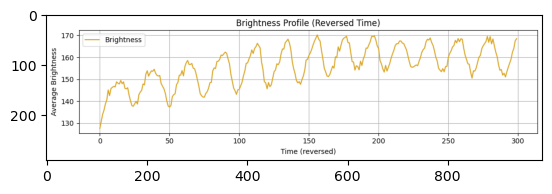

In [18]:
image1 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\0427change1.png"))
plt.imshow(image1)

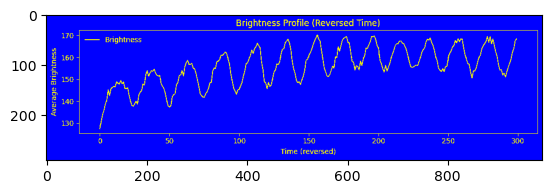

In [20]:
image1_processed = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\0427change1.png", 2, color_channels = 4)
plt.imshow(image1_processed)

In [21]:
def graph_getter(processed_image, target = [1, 1, 0, 1], change = [0, 0, 0, 1], legend_location = "top_left"):
    counts1 = color_counter(processed_image, target = target)
    counts2 = color_counter(processed_image, target = target, default_orientation = False)
    subset =  processed_image[np.argwhere(counts2 == np.max(counts2))[0, 0]+2:np.argwhere(counts2 == np.max(counts2))[1, 0]-2, np.argwhere(counts1 == np.max(counts1))[0, 0]+2:np.argwhere(counts1 == np.max(counts1))[1, 0]-2, :]
    if(legend_location == "top_left"):
        subset[:28, :125, :] = [0, 0, 1, 1]
    if(legend_location == "top_right"):
        subset[:28, 794:, :] = [0, 0, 1, 1]
    if(legend_location == "bottom_right"):
        subset[174:, 785:, :] = [0, 0, 1, 1]
    if(legend_location == "bottom_left"):
        subset[174:, :125, :] = [0, 0, 1, 1]
    return subset

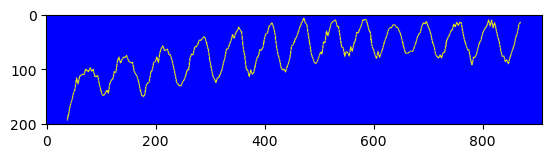

In [24]:
graph = graph_getter(image1_processed)
plt.imshow(graph)

In [25]:
graph_counts1 = color_counter(graph, target = [1, 1, 0, 1])
graph_counts2 = color_counter(graph, target = [1, 1, 0, 1], default_orientation = False)
print(graph_counts1)
print(graph_counts2)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  9  9  9 10  9  8  6  5  6
  8  8  6  5  5 11 13 11  7  7  6  8  9  6  3  3  2  2  2  2  2  3  6  6
  5  3  3  3  2  3  4  4  4  4  5  3  3  3  5  8  8  5  2  2  2  3  3  8
 10  8  7  8  7  6  6  3  2  2  3  3  4  4  4  3  4  4  8 11 12  6  4  4
  3  3  5  8  9  5  2  2 10 13 12  7  5  5  7  7  4  5  5  3  3  4  2  2
  2  3  3  3  5  5  4  4  3  2  2  2  2  2  4  9 10  9  4  4  3  3  4  5
  6  7  9  9  9  7  8  5  2  2  3  3  4 10 12 10  4  3  3  2  2  7 11 11
  6  3  5  8  9  7  2  1  3  6  6  5  7  6  9 12 10  6  6  5  3  3  4  5
  6  3  2  2  2  2  3  6  6  5  2  3  4  6  6  8  8  8  8  8  9  9 10  7
  3  3  3  3  3  2  2  2  5  5  4  3  3  4  5  5  7  8  6  3  2  7 14 15
  9  4  4  3  2  3  8  9  6  3  2  3  3  3  5  6  6  2  2  2  3  3  3  2
  3  2  3  3  6  7  7  8  7  8 12 13 11 10  9  9  9  9  6  4  4  4  5  4
  6  6  4  2  2  5  5  5  5  5  6  8  8  8  6  7  8

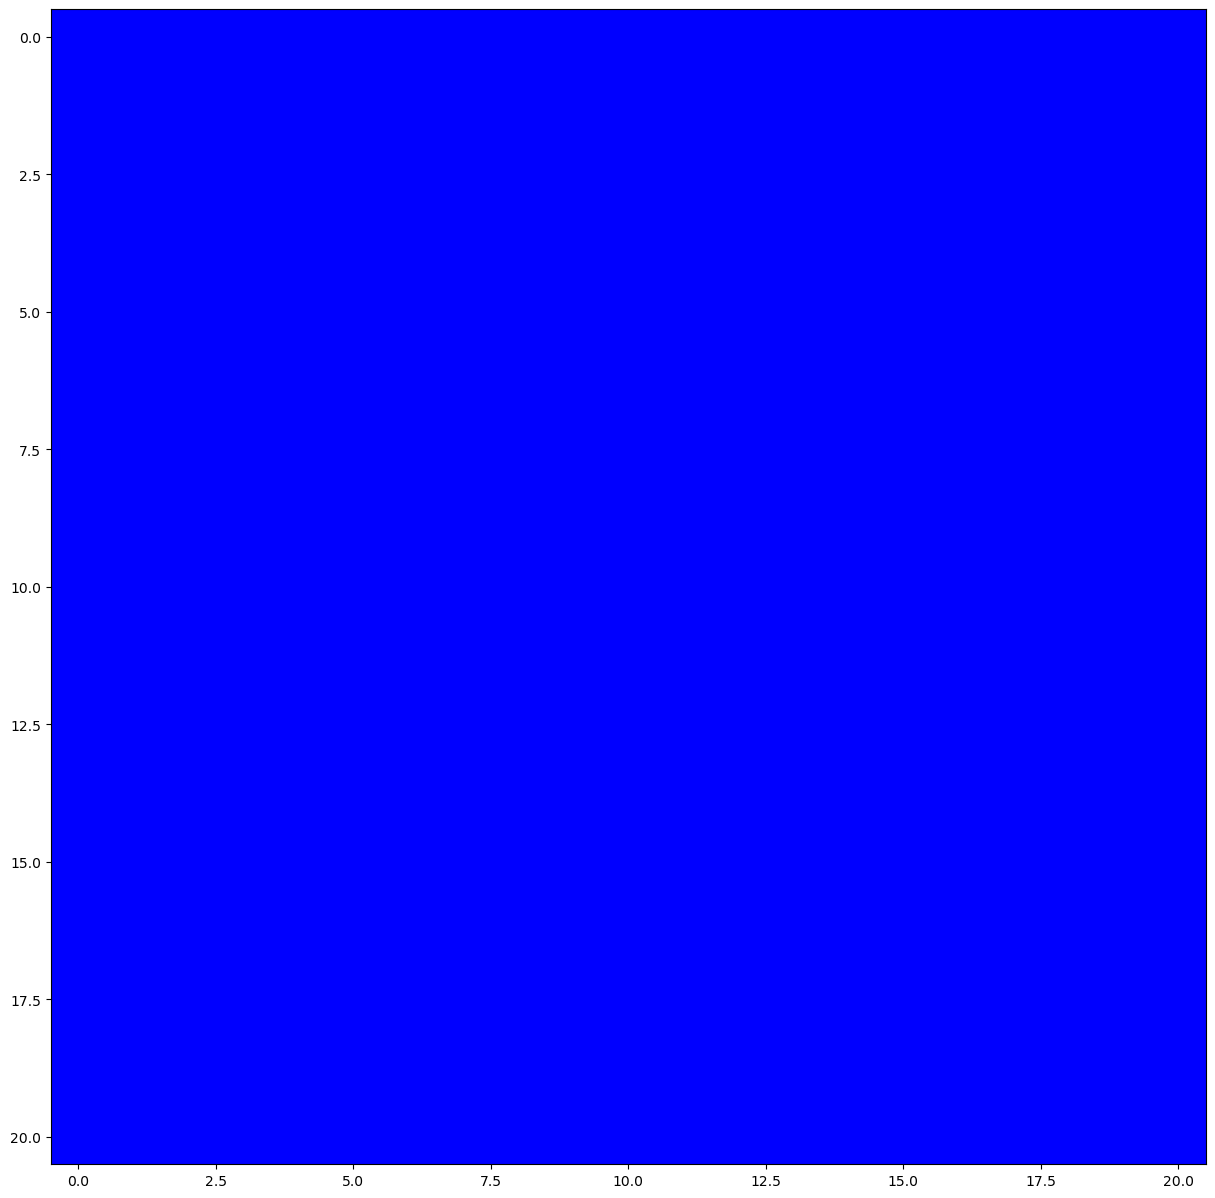

In [27]:
plt.figure(figsize = (15, 15))
plt.imshow(graph[18-10:19+10, 89-10:90+10, :])

In [28]:
color_counter(graph, target = [1, 1, 0, 1])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  9,  9,  9, 10,  9,  8,  6,  5,  6,  8,  8,  6,
        5,  5, 11, 13, 11,  7,  7,  6,  8,  9,  6,  3,  3,  2,  2,  2,  2,
        2,  3,  6,  6,  5,  3,  3,  3,  2,  3,  4,  4,  4,  4,  5,  3,  3,
        3,  5,  8,  8,  5,  2,  2,  2,  3,  3,  8, 10,  8,  7,  8,  7,  6,
        6,  3,  2,  2,  3,  3,  4,  4,  4,  3,  4,  4,  8, 11, 12,  6,  4,
        4,  3,  3,  5,  8,  9,  5,  2,  2, 10, 13, 12,  7,  5,  5,  7,  7,
        4,  5,  5,  3,  3,  4,  2,  2,  2,  3,  3,  3,  5,  5,  4,  4,  3,
        2,  2,  2,  2,  2,  4,  9, 10,  9,  4,  4,  3,  3,  4,  5,  6,  7,
        9,  9,  9,  7,  8,  5,  2,  2,  3,  3,  4, 10, 12, 10,  4,  3,  3,
        2,  2,  7, 11, 11,  6,  3,  5,  8,  9,  7,  2,  1,  3,  6,  6,  5,
        7,  6,  9, 12, 10,  6,  6,  5,  3,  3,  4,  5,  6,  3,  2,  2,  2,
        2,  3,  6,  6,  5

In [30]:
color_counter(graph, target = [1, 1, 0, 1], default_orientation = False)

array([ 0,  0,  0,  0,  0,  0,  0,  2,  4,  7, 17, 18, 18, 21, 26, 35, 42,
       43, 44, 44, 48, 43, 44, 43, 43, 36, 36, 34, 35, 38, 39, 33, 42, 42,
       43, 42, 41, 39, 40, 37, 38, 43, 44, 42, 41, 40, 40, 44, 38, 36, 42,
       45, 61, 39, 39, 38, 37, 40, 40, 45, 48, 47, 45, 49, 52, 59, 51, 48,
       53, 51, 57, 56, 51, 50, 53, 48, 54, 56, 54, 54, 42, 42, 38, 39, 41,
       44, 37, 44, 43, 35, 28, 24, 23, 20, 17, 21, 28, 21, 22, 21, 31, 39,
       42, 37, 33, 32, 30, 26, 23, 25, 26, 22, 26, 26, 24, 17, 22, 18, 18,
       21, 21, 22, 22, 20, 20, 20, 15, 15, 15, 14, 14, 13,  9, 10,  8,  9,
        9,  9,  8, 18, 13, 14, 14, 12, 10,  9, 10, 11, 10, 10,  5,  3,  2,
        1,  2,  2,  2,  1,  2,  2,  1,  2,  2,  1,  2,  2,  2,  1,  2,  2,
        2,  2,  1,  2,  2,  2,  2,  1,  2,  2,  2,  2,  1,  3,  2,  2,  3,
        2,  2,  2,  2,  2,  1,  2,  1,  0,  0,  0,  0,  0])

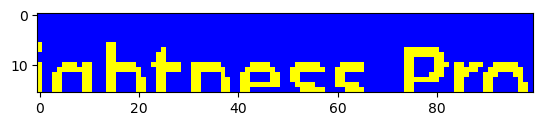

In [31]:
plt.imshow(image1_processed[4:20, 400:500, :])

In [32]:
counts1 = color_counter(image1_processed, target = [1, 1, 0, 1])
print(len(counts1))
print(counts1)

988
[  0   0   0   0   0   0   0   0   0   3  10   9  70  54  47  66  47  41
  56  68   2   4   8   0   0   0   0   0   0   0   0   0  15  10  50  10
   5   5   1  20  21  19  18  33  33   8   0  18  40  20  10  10  20  40
  12   0   0   0   0   0   0   5   5   5   5   5 206   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   8   9  20
  13  15  20  17  10   8   7   8  10  10   8   7   7  13  15  13   9   9
   8  10  11   8   5   5   4   4   4   4   4   5   8   8   7   5   5   5
   4   5   6   6   6   6   7   5   5   5   7  10  10   7   4   4   4   5
   5  10  12  10   9  10   9   8   8   5   4   4   5   5   6   6   6   5
   6   6  10  13  14   8   6   6   5   5   7  10  11   7   4   4  12  15
  14   9   7   7   9   9   6   7   7   5   5   6   4   4   4   5   5   5
   7   7   6   6   5   4   4   4   4   4   6  11  12  11   6   6   5   5
   6   7   8   9  11  17  16  12  13  12  10   

In [34]:
[counts1 == np.max(counts1)]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [35]:
counts2 = color_counter(image1_processed, target = [1, 1, 0, 1], default_orientation = False)
print(len(counts2))
print(counts2)

289
[  0   0   0   0   0   0   0   0   0   0  19  52  46  27 135 161 102 103
 128  88  80  83 141 121   6   5   6   5   0   0   0   0 915   2   2   2
   2   2  16  10   7  10  18  16  24  25  28  35  28  37  44  45  46  46
  50  45  46  45  45  38  38  36  37  40  41  35  44  44  48  49  47  45
  47  44  40  47  51  48  47  47  47  46  53  51  53  59  81  55  55  49
  49  62  50  49  51  51  55  59  54  63  55  53  65  54  59  63  60  54
  56  51  59  69  56  56  52  54  44  44  46  51  45  46  45  46  39  39
  34  28  30  38  49  29  28  39  56  44  47  42  41  44  32  28  25  27
  28  24  30  33  30  22  27  25  26  25  23  32  34  26  25  25  22  23
  17  16  22  22  16  15  13  28  23  17  19  35  24  36  21  22  27  16
  16  16  16  18  13   5   5   6   8   8   7   8   8   5   6   8   9   7
   7   9   9   7   5   4   4   4   3   4   4   4   4   3  16  13   8  10
  11  17  10   9  14  19   4   4   4   4   3   4   3   2   2   2   2   2
   2   2   2 915   7   7   7   7   7   0   0   

In [37]:
counts2 == np.max(counts2).ravel()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [40]:
counts1.argmax()

66

In [41]:
counts1[counts1.argmax() + 1:].argmax()

913

In [42]:
len(counts1)

988

In [47]:
np.argwhere(counts1 == np.max(counts1))[1, 0]

980

In [48]:
np.argwhere(counts1 == np.max(counts1))[0, 0]:np.argwhere(counts1 == np.max(counts1))[1, 0]

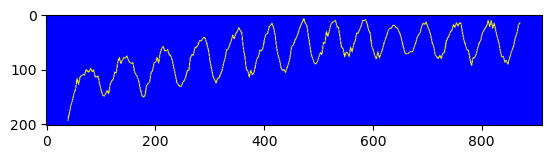

In [52]:
boxed_image = image1_processed[np.argwhere(counts2 == np.max(counts2))[0, 0]+1:np.argwhere(counts2 == np.max(counts2))[1, 0]-1, np.argwhere(counts1 == np.max(counts1))[0, 0]+1:np.argwhere(counts1 == np.max(counts1))[1, 0]-1, :]
plt.imshow(boxed_image)

In [54]:
boxed_image

array([[[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]],

       [[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]],

       [[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]],

       ...,

       [[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]],

       [[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.]],

       [[0., 0., 1., 1.],
        [0., 0., 1., 1.],
        [0., 0., 1., 1.],
        ...,
        [0., 0., 1., 1.],
        [0., 0.

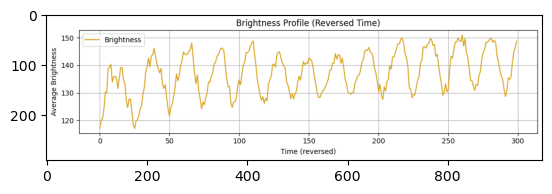

In [56]:
image2 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\0427frequencychange2.png"))
plt.imshow(image2)

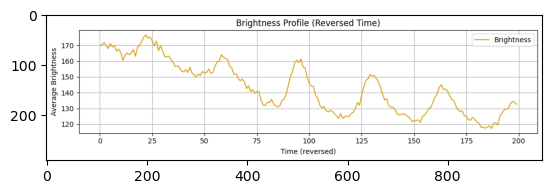

In [57]:
image3 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1201midb.png"))
plt.imshow(image3)

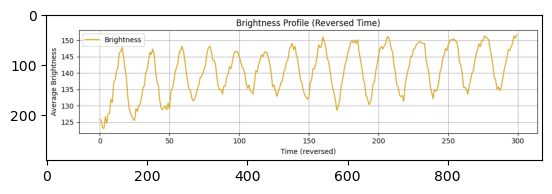

In [58]:
image4 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1501left300b.png"))
plt.imshow(image4)

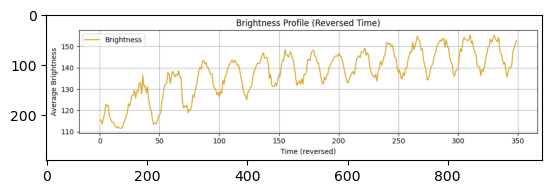

In [60]:
image5 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1501leftb.png"))
plt.imshow(image5)

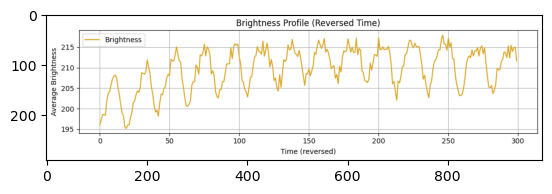

In [62]:
image6 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1501mid300b.png"))
plt.imshow(image6)

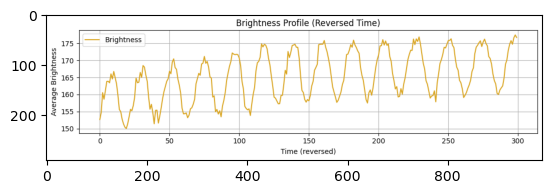

In [65]:
image7 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1501midleft300b.png"))
plt.imshow(image7)

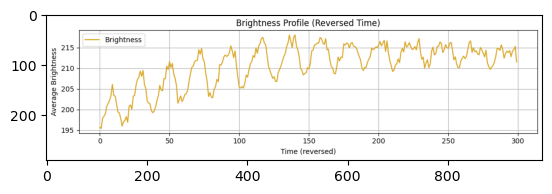

In [66]:
image8 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1501right300b.png"))
plt.imshow(image8)

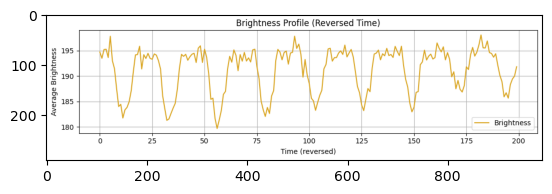

In [68]:
image9 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1801midb.png"))
plt.imshow(image9)

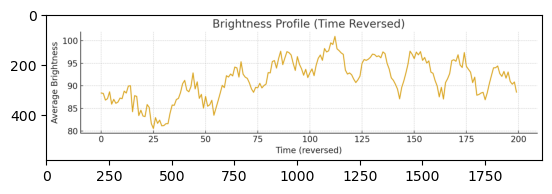

In [70]:
image10 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\freq change1.png"))
plt.imshow(image10)

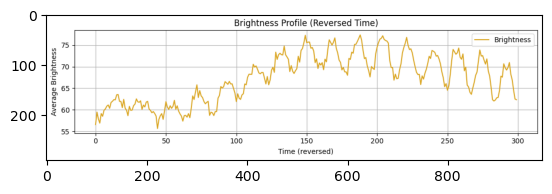

In [73]:
image12 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\frequency change 2.png"))
plt.imshow(image12)

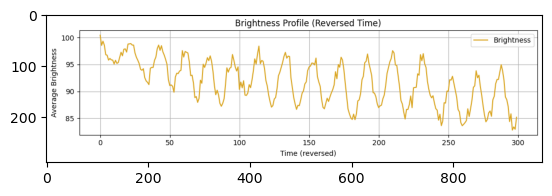

In [74]:
image13 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\frequency change 4.png"))
plt.imshow(image13)

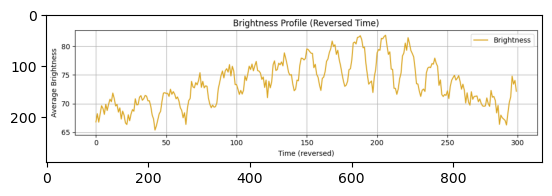

In [75]:
image14 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\frequency change.png"))
plt.imshow(image14)

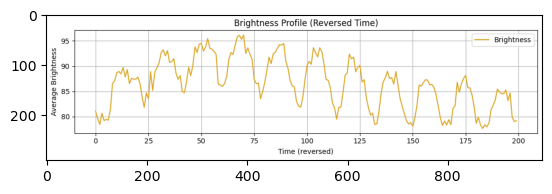

In [77]:
image15 = np.asarray(PIL.Image.open(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\难道说！.png"))
plt.imshow(image15)

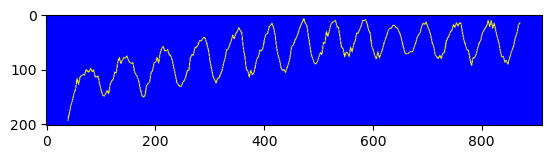

In [78]:
plt.imshow(boxed_image)

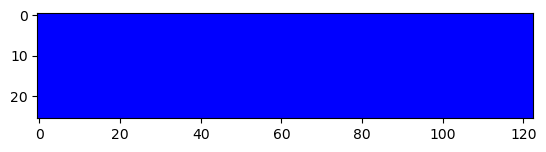

In [80]:
plt.imshow(boxed_image[:26, :123, :])

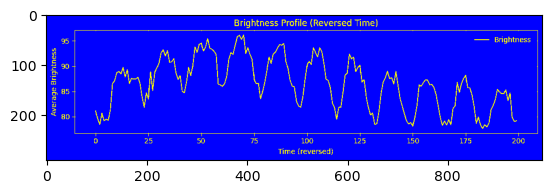

In [81]:
image15_processed = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\难道说！.png", color_channels = 4, cluster_count = 2)
plt.imshow(image15_processed)

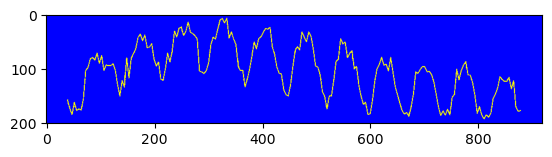

In [82]:
image15_boxed = graph_getter(image15_processed, legend_location = "top_right")
plt.imshow(image15_boxed)

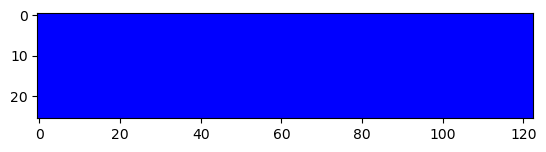

In [84]:
plt.imshow(image15_boxed[:26, 796:, :])

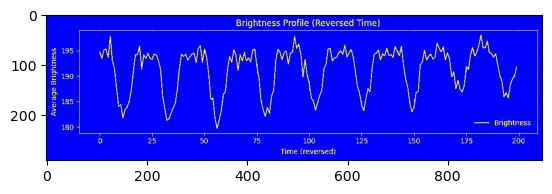

In [85]:
image9_processed = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\1801midb.png", color_channels = 4, cluster_count = 2)
plt.imshow(image9_processed)

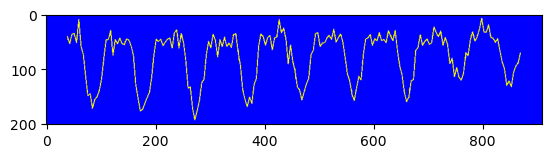

In [87]:
image9_boxed = graph_getter(image9_processed, legend_location = "bottom_right")
plt.imshow(image9_boxed)

In [88]:
image9_boxed[::-1, 50:51, :][0]

array([[0., 0., 1., 1.]])

In [90]:
image9_boxed.shape

(201, 910, 4)

In [92]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 0] == [1])

(array([164, 165], dtype=int64), array([0, 0], dtype=int64))

In [93]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 1] == [1])

(array([164, 165], dtype=int64), array([0, 0], dtype=int64))

In [95]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 2] == [0])

(array([164, 165], dtype=int64), array([0, 0], dtype=int64))

In [96]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 3] == [1])[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [99]:
image9_boxed[::-1, 50:51, :][:, :, 3]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [100]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 0] == [1])[0]

array([164, 165], dtype=int64)

In [102]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 1] == [1])[0]

array([164, 165], dtype=int64)

In [103]:
 np.where(image9_boxed[::-1, 50:51, :][:, :, 2] == [0])[0]

array([164, 165], dtype=int64)

In [104]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 3] == [1])[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [106]:
reduce(np.intersect1d, (np.where(image9_boxed[::-1, 50:51, :][:, :, 0] == [1])[0], np.where(image9_boxed[::-1, 50:51, :][:, :, 1] == [1])[0],  np.where(image9_boxed[::-1, 50:51, :][:, :, 2] == [0])[0], np.where(image9_boxed[::-1, 50:51, :][:, :, 3] == [1])[0]))

array([164, 165], dtype=int64)

In [128]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 0] == [1])

(array([164, 165], dtype=int64), array([0, 0], dtype=int64))

In [130]:
np.where(image9_boxed[::-1, 50:51, :][:, :, 3] == [1])[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

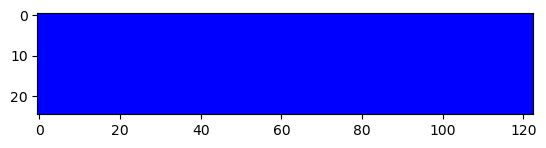

In [132]:
plt.imshow(image9_boxed[176:, 787:, :])

In [134]:
color_counter(image9_boxed, target = [1, 1, 0, 1])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  7,  6,  6,  6,  5,  8,  8,  7,  5,  2,  2,  2,
        4,  7,  7,  7,  8, 15, 19, 20, 17, 15, 23, 22, 21, 14,  7,  7,  7,
       12, 17, 18, 18, 17, 16, 17, 15, 12,  3,  2,  2,  3,  9, 12, 12, 11,
        7,  7,  8,  8,  5,  3,  3,  3,  4,  6,  5,  6,  7,  9, 10, 10, 12,
       15, 17, 17, 17, 17, 15, 15, 14,  7,  2,  2,  2,  4,  7,  7,  9, 10,
       19, 21, 20, 15, 12, 12, 13, 11,  5,  3,  4,  4,  4,  5,  5,  5,  4,
        5,  5,  5,  3,  3,  2,  2,  3,  7,  5,  5,  4,  2,  2,  2,  3,  4,
        5,  6,  5,  6,  7,  8,  8, 17, 23, 24, 24, 18, 12, 11, 11, 11, 11,
       10, 11,  9,  3,  2,  3,  3,  4,  6,  5,  5,  6,  5,  5,  5,  4,  5,
        5,  4,  7, 12, 14, 12, 14, 18, 20, 19, 18, 14, 13, 13, 11,  5,  3,
        3,  3,  2,  2,  2,  2,  4,  6,  5,  5,  5,  3,  4,  3,  3,  3,  3,
        3,  3,  2,  2,  2

In [136]:
color_counter(image15_processed, target = [1, 1, 0, 1])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  10,   9,  72,
        54,  47,  66,  48,  41,  56,  70,   2,   4,   8,   0,   0,   0,
         0,   0,   0,   0,   0,  22,  30,  14,  12,  20,  36,  26,   0,
        15,  26,  16,  10,  14,  23,  21,   7,   0,   0,   0,   0,   0,
         4,   4,   4,   4,   4, 206,   6,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,  10,   8,   9,  20,  13,  17,  14,   9,
         8,   7,   7,   9,  12,  12,  12,   9,  10,   8,   9,   7,   4,
         4,   4,   5,   4,   4,   4,   5,  10,  11,  12,  11,  19,  24,
        24,  25,  16,   6,   5,   5,   7,   8,   9,   9,   8,   6,   4,
         4,   4,   5,   5,   5,   5,   6,   8,   8,   8,   8,  10,  10,
        10,   9,   7,   9,   8,   8,  11,  15,  14,  13,   8,   7,   7,
         7,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   

In [137]:
def color_tracer(image, target = [1, 1, 0, 1]):

    index = color_counter(image, target = target)
    index2 = np.where(index > 0)
    location = []                                                                       

    for i in index2[0][:-1]:
        location.append(np.mean(reduce(np.intersect1d, (np.where(image[::-1, i:i+1, :][:, :, 0] == np.array([target[0]]))[0], np.where(image[::-1, i:i+1, :][:, :, 1] == np.array([target[1]]))[0],  np.where(image[::-1, i:i+1, :][:, :, 2] == np.array([target[2]]))[0], np.where(image9_boxed[::-1, 50:51, :][:, :, 3] == np.array([target[3]]))[0]))))

    location = np.array([location])
            
    return location[np.where(location > 0)]                                                          # return the list as a NumPy arrayd

In [138]:
index = color_counter(image15_boxed, target = [1, 1, 0, 1])
index

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  3,  9,  7,  7,  6,  7,  6,  5,  5,  7, 10, 10,
       10,  7,  8,  6,  7,  5,  2,  2,  2,  3,  2,  2,  2,  3,  8,  9, 10,
        9, 17, 22, 22, 23, 14,  4,  3,  3,  5,  6,  7,  7,  6,  4,  2,  2,
        2,  3,  3,  3,  3,  4,  6,  6,  6,  6,  8,  8,  8,  7,  5,  7,  6,
        6,  9, 13, 12, 11,  6,  5,  5,  5,  3,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  4,  6,  6,  6,  9, 11, 12, 11, 10,  9,  9,  9,
        8, 11, 12, 13, 11,  6,  5,  5,  6, 23, 24, 25, 23, 13, 16, 16, 16,
       12, 15, 15, 16, 13,  7,  5,  5,  4,  4,  4,  5,  5,  8,  9,  9,  9,
        6,  3,  3,  4,  4,  5,  6,  6,  5,  5,  5,  4,  5,  7, 10, 10, 10,
        6,  2,  1,  2,  2,  3,  3,  3,  4, 11, 13, 12, 12,  8,  6,  6,  6,
        4,  4,  4,  4,  7, 13, 14, 13, 10,  2,  2,  3,  3,  8, 10,  9,  9,
       11, 13, 13, 13,  7

In [139]:
np.where(index > 0)

(array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
        182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216

In [142]:
index2 = np.where(index > 0)
index2

(array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
        182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216

In [143]:
index2[0][:-1]

array([ 39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [146]:
[1, 2, 3, 4, 5][:-1]

[1, 2, 3, 4]

In [149]:
locations = color_tracer(image15_boxed)
locations

array([ 41.        ,  39.        ,  36.        ,  32.        ,
        28.5       ,  26.14285714,  22.5       ,  20.        ,
        17.        ,  18.        ,  21.5       ,  26.5       ,
        32.5       ,  34.71428571,  33.5       ,  30.5       ,
        27.        ,  24.        ,  23.5       ,  23.5       ,
        24.5       ,  25.        ,  25.5       ,  24.5       ,
        24.5       ,  24.        ,  26.5       ,  30.        ,
        34.5       ,  40.        ,  49.        ,  58.5       ,
        70.5       ,  83.        ,  90.21428571,  97.5       ,
        99.        , 100.        , 102.        , 104.5       ,
       108.        , 112.        , 115.5       , 117.5       ,
       118.5       , 119.5       , 119.5       , 120.        ,
       119.        , 118.        , 117.        , 116.5       ,
       118.5       , 121.5       , 124.5       , 126.5       ,
       124.5       , 120.5       , 115.5       , 112.        ,
       112.        , 115.        , 118.5       , 121.5 

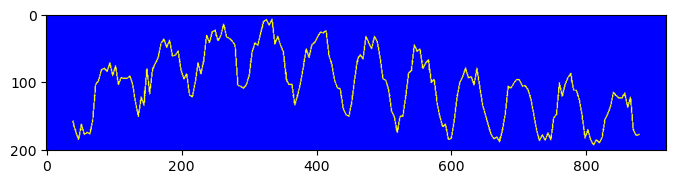

In [151]:
plt.figure(figsize = (8, 2))
plt.imshow(image15_boxed)

In [152]:
len(locations)

840

In [153]:
range(len(locations))

range(0, 840)

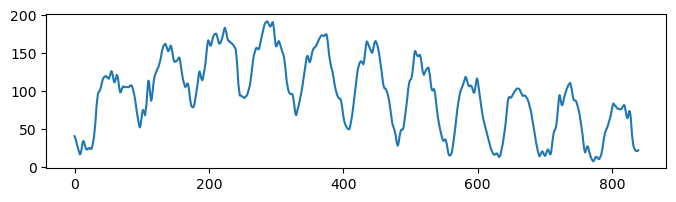

In [154]:
plt.figure(figsize = (8, 2))
plt.plot(range(len(locations)), locations)

In [155]:
image15_processed = image_segmentation(r"C:\Users\Jose\Desktop\physarum_polycephalum\urw_2025\intensity_detection_graphs\难道说！.png", color_channels = 4, cluster_count = 2)
image15_boxed = graph_getter(image15_processed, legend_location = "top_right")
locations = color_tracer(image15_boxed)

In [157]:
peaks = find_peaks(locations)
troughs = find_peaks(-locations)

In [158]:
peaks[0:10][0]

array([ 13,  22,  47,  55,  63,  73,  84, 102, 110, 135, 143, 156, 168,
       186, 199, 210, 224, 271, 287, 295, 304, 347, 368, 375, 426, 435,
       448, 507, 514, 526, 535, 552, 582, 589, 599, 628, 647, 659, 669,
       696, 705, 722, 738, 763, 776, 802, 818, 826], dtype=int64)

In [160]:
locations[np.array(peaks[0:10][0])]

array([ 34.71428571,  25.5       , 120.        , 126.5       ,
       121.5       , 106.5       , 108.        ,  75.5       ,
       114.        , 162.5       , 160.        , 144.5       ,
       110.5       , 126.        , 167.        , 175.5       ,
       183.5       , 157.        , 192.        , 191.        ,
       166.        , 146.5       , 173.5       , 175.        ,
       139.5       , 165.5       , 166.        , 153.        ,
       148.        , 131.        , 103.        ,  37.        ,
       119.        , 107.5       , 117.        ,  18.5       ,
        92.5       , 103.5       ,  94.5       ,  21.        ,
        23.5       ,  95.        , 111.        ,  27.5       ,
        14.        ,  84.        ,  82.        ,  74.        ])

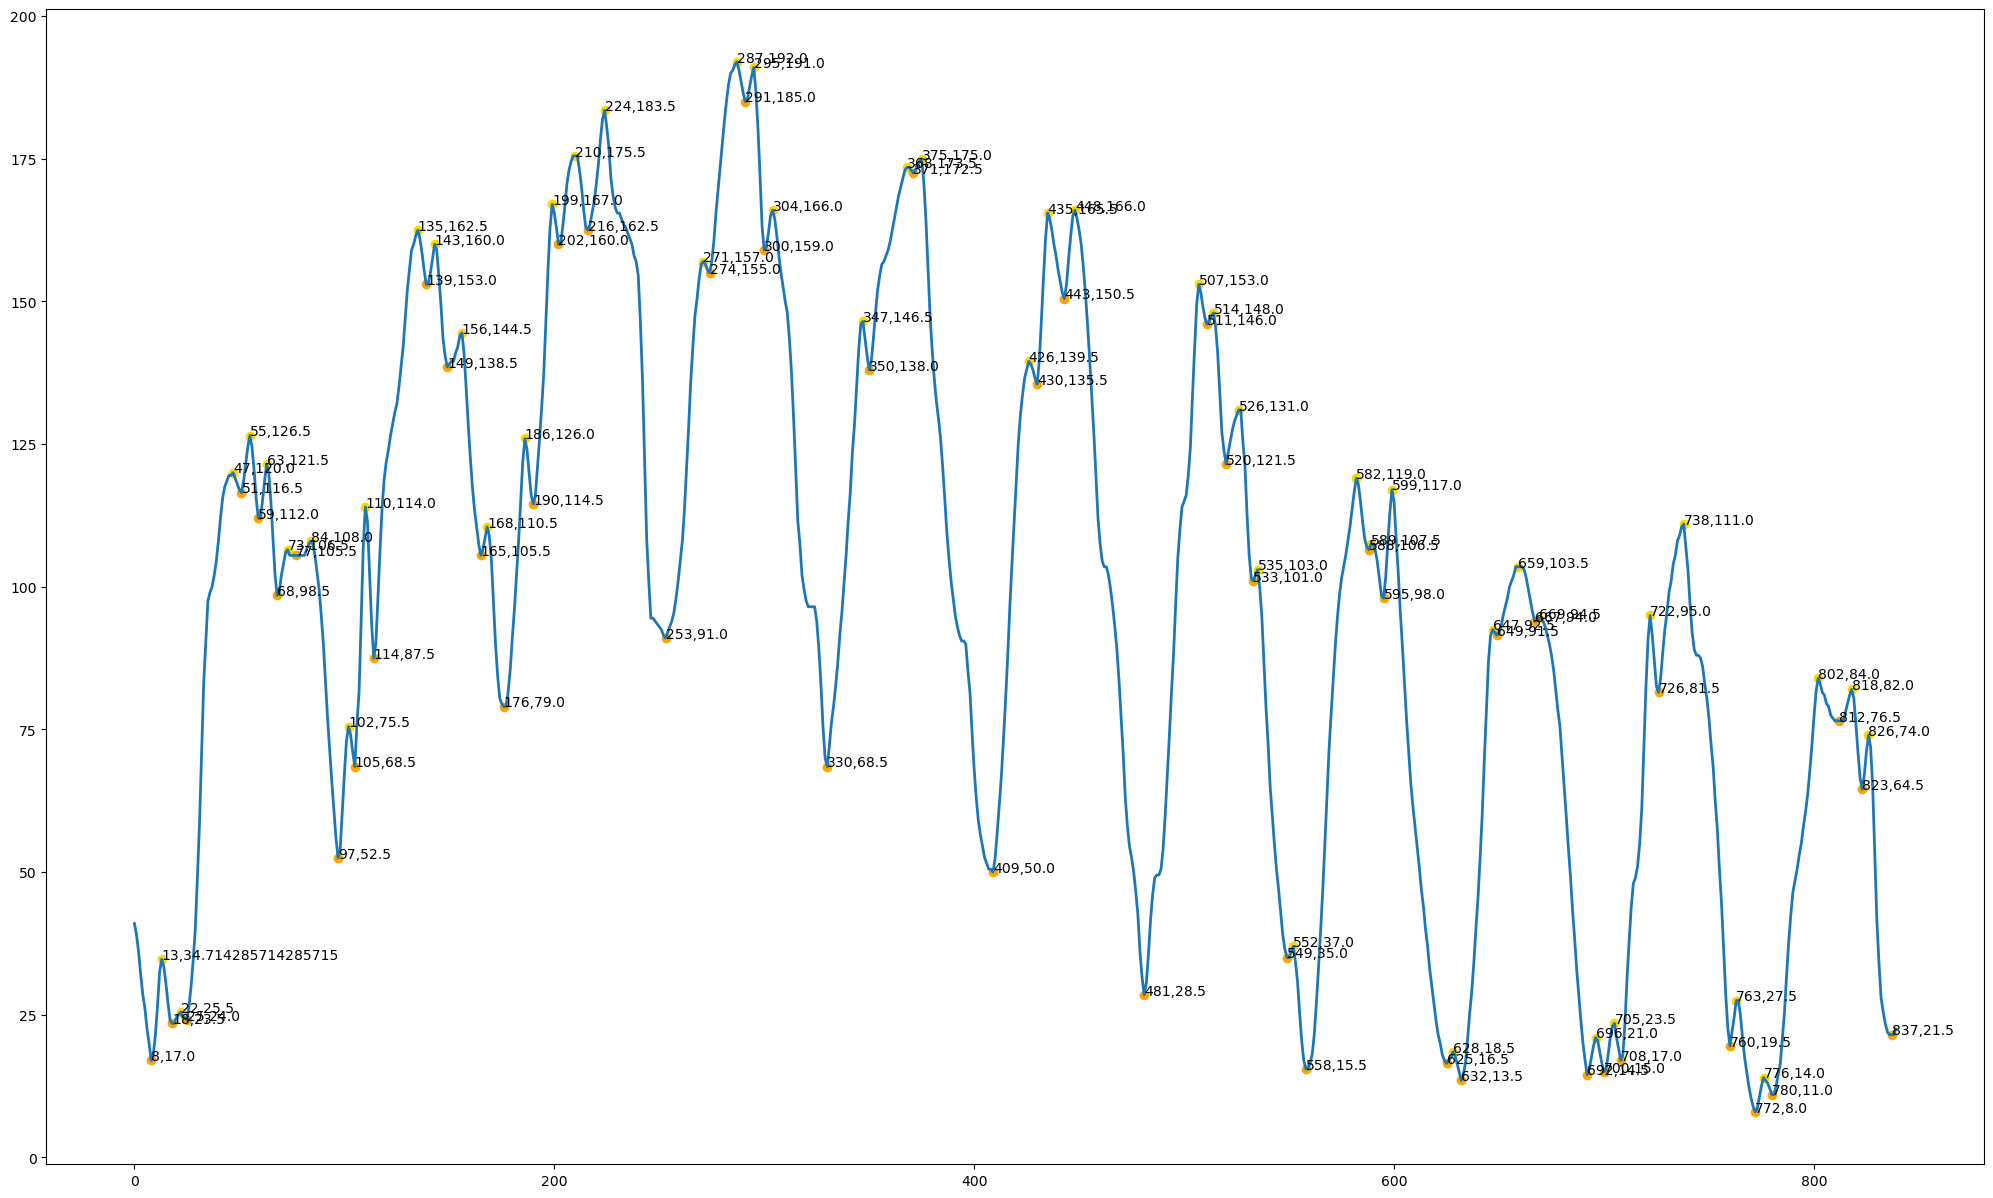

<Figure size 1500x1500 with 0 Axes>

In [198]:
fig, vis = plt.subplots(figsize = (25, 15))
x = range(len(locations))
y = locations
visual = vis.plot(x, y, lw = 2)
#for i in x:
#    item = str(i) + ",", str(locations[i])
#    vis.annotate(item, xy = (i, locations[i]))
#vis.annotate(str(i) + "," + str(locations[i]), xy = (i, locations[i]))
#plt.scatter([50, 160, 700], [25, 125, 50], color = "gold")
plt.scatter(peaks[:1], locations[np.array(peaks[:1][0])], color = "gold")
for i in peaks[0]:
    item = str(i) + "," + str(locations[i])
    vis.annotate(item, xy = (i, locations[i]))
plt.scatter(troughs[:1], locations[np.array(troughs[:1][0])], color = "orange")
for i in troughs[0]:
    item = str(i) + "," + str(locations[i])
    vis.annotate(item, xy = (i, locations[i]))
plt.figure(figsize = (15, 15))
plt.show()